In [1]:
import xarray as xr
import pandas as pd
from pathlib import Path
import ast
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## checking for NaNs in ET data

In [17]:
sfe = np.load("/scratch/users/ashdef/pre_treatment_data/sfe_pre_filtered.npz", allow_pickle = True)["sfe_list"] 
len(sfe)

12560

In [27]:
nan_pixels = []
for pixel in range (len(sfe)):
    if np.isnan(sfe[pixel]).sum() == len(sfe[pixel]): # if all timesteps for that pixel are nan
        nan_pixels.append(pixel)

print("Number of pixels with all NaNs = ", len(nan_pixels))

Number of pixels with all NaNs =  89


In [4]:
some_nans = []
for pixel in range (len(sfe)):
    if (np.isnan(sfe[pixel]).sum() > 0 and np.isnan(sfe[pixel]).sum() != len(sfe[pixel])): # there are nan months but not all
        print("pixel id = ", pixel, ", # nans = ", np.isnan(sfe[pixel]).sum(), ", # pre-trtmt timesteps = ", len(sfe[pixel]))
        some_nans.append(pixel)

print("Number of pixels with NaN>0, less than # timesteps = ", len(some_nans))

pixel id =  682 , # nans =  1 , # pre-trtmt timesteps =  48
pixel id =  770 , # nans =  1 , # pre-trtmt timesteps =  60
pixel id =  899 , # nans =  2 , # pre-trtmt timesteps =  72
pixel id =  904 , # nans =  2 , # pre-trtmt timesteps =  72
pixel id =  1101 , # nans =  2 , # pre-trtmt timesteps =  84
pixel id =  1110 , # nans =  2 , # pre-trtmt timesteps =  84
pixel id =  1167 , # nans =  2 , # pre-trtmt timesteps =  96
pixel id =  1380 , # nans =  3 , # pre-trtmt timesteps =  120
pixel id =  1579 , # nans =  3 , # pre-trtmt timesteps =  144
pixel id =  1924 , # nans =  3 , # pre-trtmt timesteps =  180
pixel id =  1964 , # nans =  3 , # pre-trtmt timesteps =  180
pixel id =  2429 , # nans =  3 , # pre-trtmt timesteps =  216
pixel id =  2592 , # nans =  3 , # pre-trtmt timesteps =  228
pixel id =  2994 , # nans =  3 , # pre-trtmt timesteps =  240
pixel id =  3150 , # nans =  3 , # pre-trtmt timesteps =  252
pixel id =  3277 , # nans =  3 , # pre-trtmt timesteps =  264
pixel id =  3279 , 

In [8]:
pixel_treatment = pd.read_csv('pixel_treatment_clean.csv')
pixel_treatment = pixel_treatment.sort_values('treatment_date')
pixel_treatment = pixel_treatment.reset_index()

In [33]:
# filter treated pixels df to only include rows that mach nan_pixels
# this works because I sorted the pixel_treatment_df to be in the same order it was when I read in the sfe arrays
nan_pixels_latlon = pixel_treatment[pixel_treatment.index.isin(nan_pixels)]
nan_pixels_latlon

,index,Unnamed: 0,pixel_id,lat,lon,pixel_geometry,index_right,treatment_date,twig_categ,treatment_geometry
234,6701,259199,"(187, 17)",41.608333,-124.058333,POLYGON ((-13807791.335560022 5099387.83044729...,31019,1987-08-15,Mechanical,POLYGON Z ((-13812315.689399999 5099696.530199...
2256,9273,377037,"(272, 45)",38.066667,-122.891667,POLYGON ((-13677918.596301204 4585902.55051853...,50624,2002-10-25,Planned Ignition Planned Ignition,MULTIPOLYGON Z (((-13682411.820700001 4590509....
2257,9241,375651,"(271, 45)",38.108333,-122.891667,POLYGON ((-13677918.596301204 4591794.01309194...,50624,2002-10-25,Planned Ignition,POLYGON Z ((-13682247.5387 4591982.033799998 -...
2476,9436,383977,"(277, 55)",37.858333,-122.475000,POLYGON ((-13631535.475137336 4556495.37799283...,52431,2003-09-30,Mechanical,MULTIPOLYGON Z (((-13636174.1865 4558406.83529...
2510,4963,199596,"(144, 12)",43.400000,-124.266667,POLYGON ((-13830982.896141954 5369864.11719773...,54044,2003-10-16,Mechanical,POLYGON Z ((-13831124.898 5372492.2119999975 -...
...,...,...,...,...,...,...,...,...,...,...
12250,11442,512933,"(370, 113)",33.983333,-120.058333,POLYGON ((-13362513.372386927 4023767.80311640...,50661,2023-09-22,"Biological, Mechanical, Planned Ignition",MULTIPOLYGON Z (((-13363618.385499999 4027707....
12252,11418,511547,"(369, 113)",34.025000,-120.058333,POLYGON ((-13362513.372386927 4029361.52138964...,50661,2023-09-22,"Biological, Mechanical, Planned Ignition",MULTIPOLYGON Z (((-13363618.385499999 4027707....
12253,11420,511557,"(369, 123)",34.025000,-119.641667,POLYGON ((-13316130.251223065 4029361.52138964...,50661,2023-09-22,"Biological, Mechanical, Planned Ignition",MULTIPOLYGON Z (((-13363618.385499999 4027707....
12255,11395,510173,"(368, 125)",34.066667,-119.558333,POLYGON ((-13306853.62699029 4034957.984577866...,50661,2023-09-22,"Biological, Mechanical, Planned Ignition",MULTIPOLYGON Z (((-13363618.385499999 4027707....


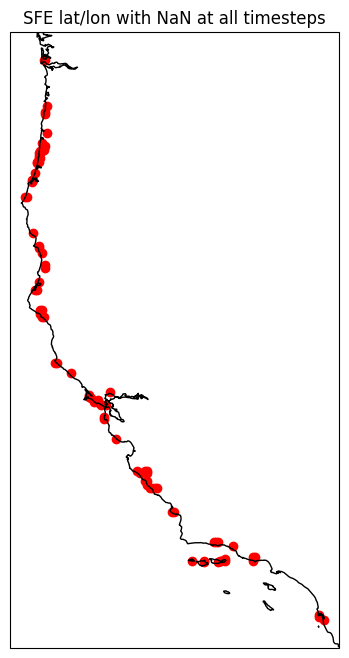

In [34]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

lat_vals = nan_pixels_latlon['lat'].values
lon_vals = nan_pixels_latlon['lon'].values
# print(lon_vals.min(), lon_vals.max())
# print(lat_vals.min(), lon_vals.max())

ax.scatter(lon_vals, lat_vals, color = 'red', transform = ccrs.PlateCarree())
ax.coastlines()

plt.title("SFE lat/lon with NaN at all timesteps")

plt.show()

### comparing nans of filtered arrays to original .nc file nans to ensure it's not a lat/lon issue

In [36]:
sfe_original = xr.open_dataset("/scratch/users/ashdef/SFE_monthly/SFE_monthly_skipna.nc")
sfe_original


<xarray.Dataset> Size: 3GB
Dimensions:  (time: 468, lat: 585, lon: 1386)
Coordinates:
  * lat      (lat) float64 5kB 49.4 49.36 49.32 49.28 ... 25.15 25.11 25.07
  * lon      (lon) float64 11kB -124.8 -124.7 -124.7 ... -67.14 -67.1 -67.06
  * time     (time) datetime64[ns] 4kB 1985-01-01 1985-02-01 ... 2023-12-01
Data variables:
    ET       (time, lat, lon) float64 3GB ...

In [37]:
nan_pixels_latlon['lon']

234     -124.058333
2256    -122.891667
2257    -122.891667
2476    -122.475000
2510    -124.266667
            ...    
12250   -120.058333
12252   -120.058333
12253   -119.641667
12255   -119.558333
12256   -119.683333
Name: lon, Length: 89, dtype: float64

In [38]:
nearest_pixels = sfe_original.sel(lat = xr.DataArray(nan_pixels_latlon['lat']), lon = xr.DataArray(nan_pixels_latlon['lon']), method = 'nearest')
nearest_pixels

<xarray.Dataset> Size: 339kB
Dimensions:  (time: 468, dim_0: 89)
Coordinates:
    lat      (dim_0) float64 712B 41.61 38.07 38.11 37.86 ... 34.03 34.07 34.03
    lon      (dim_0) float64 712B -124.1 -122.9 -122.9 ... -119.6 -119.6 -119.7
  * time     (time) datetime64[ns] 4kB 1985-01-01 1985-02-01 ... 2023-12-01
  * dim_0    (dim_0) int64 712B 234 2256 2257 2476 ... 12252 12253 12255 12256
Data variables:
    ET       (time, dim_0) float64 333kB ...

In [39]:
sfe_og_nans_lats = nearest_pixels['lat'].values
sfe_og_nans_lons = nearest_pixels['lon'].values

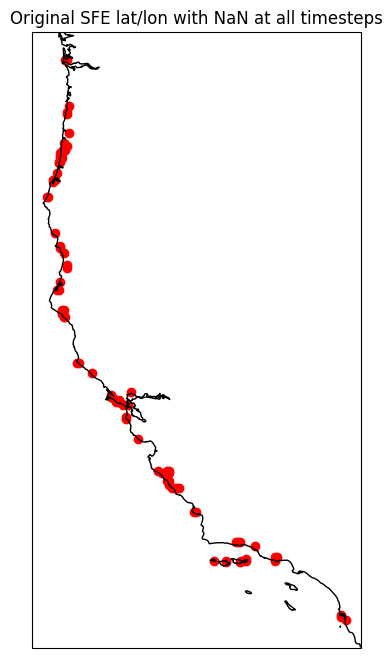

In [40]:
# checking if there's a visible difference in the location of NaN pixels straight from SFE, using og coords instead of coordinates from spatial join
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

lat_vals = sfe_og_nans_lats
lon_vals = sfe_og_nans_lons
# print(lon_vals.min(), lon_vals.max())
# print(lat_vals.min(), lon_vals.max())

ax.scatter(lon_vals, lat_vals, color = 'red', transform = ccrs.PlateCarree())
ax.coastlines()

plt.title("Original SFE lat/lon with NaN at all timesteps")

plt.show()

In [41]:
# difference between the coordinates after spatial join and orignal sfe for nan pixels
lat_diff = nan_pixels_latlon['lat'] -sfe_og_nans_lats
lon_diff = nan_pixels_latlon['lon'] - sfe_og_nans_lons

In [42]:
print("Number of all NaN pixels where original lon and treatment lon do not completely line up: ", np.sum(lon_diff != 0))
for i in range(len(lon_diff)):
    pixel_id = nan_pixels_latlon.index[i]
    if lon_diff[pixel_id] != 0:
        print(lon_diff[pixel_id])

Number of all NaN pixels where original lon and treatment lon do not completely line up:  37
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14


In [43]:
print(np.sum(lat_diff != 0))
for i in range(len(lat_diff)):
    pixel_id = nan_pixels_latlon.index[i]
    if lat_diff[pixel_id] != 0:
        print(lat_diff[pixel_id])

17
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15
-7.105427357601002e-15


## filter arrays and pixel_treatment df to exclude pixels with any nans

In [54]:
sfe = np.load("/scratch/users/ashdef/pre_treatment_data/sfe_pre_filtered.npz", allow_pickle = True)["sfe_list"] 


In [55]:
len(sfe)

12560

In [56]:
anynan_pixels = []
for pixel in range (len(sfe)):
    if np.isnan(sfe[pixel]).sum()>0: # if any timesteps are nan, ie it is a coastal pixel or includes a monthly nan
        anynan_pixels.append(pixel)

print("Number of pixels with all NaNs = ", len(anynan_pixels))


Number of pixels with all NaNs =  147


In [62]:
pixel_treatment = pd.read_csv('pixel_treatment_clean.csv')
pixel_treatment = pixel_treatment.sort_values('treatment_date')
pixel_treatment = pixel_treatment.reset_index()

In [58]:
pixel_treatment_nonans = pixel_treatment[~pixel_treatment.index.isin(anynan_pixels)] # keeping rows if indices are not in the list of nan pixel ids

In [63]:
pixel_treatment_nonans = pixel_treatment_nonans.rename(columns = {'Unnamed: 0' : 'sfe_df_index', 'index' : 'unsorted_index'})
pixel_treatment_nonans

,unsorted_index,sfe_df_index,pixel_id,lat,lon,pixel_geometry,index_right,treatment_date,twig_categ,treatment_geometry
0,2190,116676,"(84, 252)",45.900000,-114.266667,POLYGON ((-12717787.98820922 5761006.692671617...,5439,1986-01-01,Mechanical,MULTIPOLYGON Z (((-12717456.6514 5760763.97770...
1,6039,234246,"(169, 12)",42.358333,-124.266667,POLYGON ((-13830982.896141954 5211670.14706264...,46058,1986-01-01,Mechanical,POLYGON Z ((-13834012.5258 5218561.729099996 -...
2,3344,152619,"(110, 159)",44.816667,-118.141667,POLYGON ((-13149151.015033154 5589436.68652023...,44196,1986-01-07,Mechanical,POLYGON Z ((-13154055.344700001 5588978.509900...
3,10973,482615,"(348, 287)",34.900000,-112.808333,POLYGON ((-12555447.064135693 4147472.47688450...,23130,1986-02-01,Mechanical,POLYGON Z ((-12558898.384 4150060.4245000035 -...
4,4535,184401,"(133, 63)",43.858333,-122.141667,POLYGON ((-13594428.978206249 5440329.27497087...,35229,1986-02-01,Mechanical Mechanical,MULTIPOLYGON Z (((-13598303.988699999 5443431....
...,...,...,...,...,...,...,...,...,...,...
12555,10404,438246,"(316, 270)",36.233333,-113.516667,POLYGON ((-12634298.370114263 4329900.57739480...,54740,2023-12-29,Mechanical,MULTIPOLYGON Z (((-12638319.9999 4336078.2817 ...
12556,10386,436860,"(315, 270)",36.275000,-113.516667,POLYGON ((-12634298.370114263 4335650.90843343...,54740,2023-12-29,Mechanical,MULTIPOLYGON Z (((-12638319.9999 4336078.2817 ...
12557,10385,436859,"(315, 269)",36.275000,-113.558333,POLYGON ((-12638936.68223065 4335650.908433433...,54740,2023-12-29,Mechanical,MULTIPOLYGON Z (((-12638319.9999 4336078.2817 ...
12558,2090,112491,"(81, 225)",46.025000,-115.391667,POLYGON ((-12843022.415351653 5781016.95665349...,67564,2023-12-30,Mechanical Mechanical,MULTIPOLYGON Z (((-12846109.4089 5781947.29540...


In [64]:
pixel_treatment_nonans.to_csv('/scratch/users/ashdef/pre_treatment_data/no_nans/pixel_treatment.csv')

## filter SFE and climate data to exclude pixels with nans

In [65]:
non_nan_sfe = []

for pixel in range(len(sfe)):
    if (np.isnan(sfe[pixel]).sum() ==0 ):
        non_nan_sfe.append(sfe[pixel])

print(len(non_nan_sfe))

12413


In [66]:
sfe_obj = np.array(non_nan_sfe, dtype=object)
np.savez_compressed("/scratch/users/ashdef/pre_treatment_data/no_nans/sfe_pre_arrays.npz", sfe_pre = sfe_obj)


In [67]:
climate_pre = np.load("/scratch/users/ashdef/pre_treatment_data/climate_pre_filtered.npz", allow_pickle = True)["climate_list"]

In [68]:
len(climate_pre[0])

12

In [69]:
non_nan_climate = []

for pixel in range(len(sfe)):
    if (np.isnan(sfe[pixel]).sum() ==0 ):
        non_nan_climate.append(climate_pre[pixel])

print(len(non_nan_climate))

12413


In [70]:
clim_obj = np.array(non_nan_climate, dtype=object)
np.savez_compressed("/scratch/users/ashdef/pre_treatment_data/no_nans/climate_pre_arrays.npz", clim_pre = clim_obj)


In [71]:
sfe = np.load("/scratch/users/ashdef/pre_treatment_data/no_nans/sfe_pre_arrays.npz", allow_pickle = True)["sfe_pre"] 


In [73]:
sfe.shape

(12413,)

In [76]:
sfe_nans = []

for pixel in range(len(sfe)):
    if (np.isnan(sfe[pixel]).sum() >0 ):
        sfe_nans.append(sfe[pixel])

print(len(sfe_nans))

0
